In [1]:
import pandas as pd
#importiert pandas
import numpy as np
#importiert numpy
import matplotlib.pyplot as plt
#importier nur pyplot von matplotlib
from statistics import stdev
from scipy import stats
import random
import seaborn as sb
import os, os.path
import math
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
import scipy


%matplotlib inline

In [2]:
#constant values
DATA_DIRECTORY_LOW_CONTRAST = '..\\Daten_niedriger_kontrast\\'
#constant values
DATA_DIRECTORY_HIGH_CONTRAST = '..\\Daten_hoher_kontrast\\'

In [3]:
proband_directories_low_contrast = [name for name in os.listdir(DATA_DIRECTORY_LOW_CONTRAST) if (os.path.isdir(os.path.join(DATA_DIRECTORY_LOW_CONTRAST, name))) & ('proband' in name)]
all_proband_dataframe_dict_low_contrast = {}
for i in range(len(proband_directories_low_contrast)):
    proband_name = proband_directories_low_contrast[i].split('_')[1]
    proband_files = [name for name in os.listdir(os.path.join(DATA_DIRECTORY_LOW_CONTRAST, proband_directories_low_contrast[i])) if (os.path.isfile(os.path.join(DATA_DIRECTORY_LOW_CONTRAST, proband_directories_low_contrast[i], name)) & ('.dat' in name))]
    dataframe_dict = {}
    for file in proband_files:
        dataframe_dict[file] = pd.read_table(os.path.join(DATA_DIRECTORY_LOW_CONTRAST, proband_directories_low_contrast[i], file), sep=', ', engine='python')
    all_proband_dataframe_dict_low_contrast[proband_name] = dataframe_dict

In [4]:
proband_directories_high_contrast = [name for name in os.listdir(DATA_DIRECTORY_HIGH_CONTRAST) if (os.path.isdir(os.path.join(DATA_DIRECTORY_HIGH_CONTRAST, name))) & ('proband' in name)]
all_proband_dataframe_dict_high_contrast = {}
for i in range(len(proband_directories_high_contrast)):
    proband_name = proband_directories_high_contrast[i].split('_')[1]
    proband_files = [name for name in os.listdir(os.path.join(DATA_DIRECTORY_HIGH_CONTRAST, proband_directories_high_contrast[i])) if (os.path.isfile(os.path.join(DATA_DIRECTORY_HIGH_CONTRAST, proband_directories_high_contrast[i], name)) & ('.dat' in name))]
    dataframe_dict = {}
    for file in proband_files:
        dataframe_dict[file] = pd.read_table(os.path.join(DATA_DIRECTORY_HIGH_CONTRAST, proband_directories_high_contrast[i], file), sep=', ', engine='python')
    all_proband_dataframe_dict_high_contrast[proband_name] = dataframe_dict

In [5]:
for proband in all_proband_dataframe_dict_low_contrast:
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:
        td_2 = all_proband_dataframe_dict_low_contrast[proband][file_name]
        td_2["Kreis"] = 360
        #Spalte 'Kreis' eingefügt, da der absolute Wert '360' in Formel nicht angenommen wurde

        td_2["delta_fg_bg"] = np.zeros((64,))

        for j in range(td_2['bg'].shape[0]):
            dist = td_2['fg'][j] - td_2['bg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_fg_bg"] = dist
        all_proband_dataframe_dict_low_contrast[proband][file_name] = td_2

In [6]:
for proband in all_proband_dataframe_dict_low_contrast:
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:
        for i in range(64):
            if (all_proband_dataframe_dict_low_contrast[proband][file_name].loc[i, 'bg'] == 0):
                print (all_proband_dataframe_dict_low_contrast[proband][file_name].loc[i, 'delta_fg_bg'])

-22.5
112.5
-22.5
112.5
-157.5
157.5
-67.5
-67.5
-112.5
157.5
22.5
67.5
67.5
-157.5
22.5
-112.5
-90.0
-135.0
-45.0
180.0
180.0
135.0
45.0
-135.0
-90.0
-45.0
135.0
45.0
90.0
0.0
0.0
90.0
157.5
-67.5
-22.5
112.5
-112.5
67.5
-112.5
22.5
157.5
-157.5
-157.5
-22.5
67.5
-67.5
22.5
112.5
-135.0
0.0
180.0
45.0
90.0
-135.0
-45.0
-90.0
-90.0
135.0
180.0
135.0
0.0
45.0
-45.0
90.0
-22.5
112.5
-22.5
112.5
-157.5
157.5
-67.5
-67.5
-112.5
157.5
22.5
67.5
67.5
-157.5
22.5
-112.5
-90.0
-135.0
-45.0
180.0
180.0
135.0
45.0
-135.0
-90.0
-45.0
135.0
45.0
90.0
0.0
0.0
90.0
157.5
-67.5
-22.5
112.5
-112.5
67.5
-112.5
22.5
157.5
-157.5
-157.5
-22.5
67.5
-67.5
22.5
112.5
-135.0
0.0
180.0
45.0
90.0
-135.0
-45.0
-90.0
-90.0
135.0
180.0
135.0
0.0
45.0
-45.0
90.0
-22.5
112.5
-22.5
112.5
-157.5
157.5
-67.5
-67.5
-112.5
157.5
22.5
67.5
67.5
-157.5
22.5
-112.5
-90.0
-135.0
-45.0
180.0
180.0
135.0
45.0
-135.0
-90.0
-45.0
135.0
45.0
90.0
0.0
0.0
90.0
157.5
-67.5
-22.5
112.5
-112.5
67.5
-112.5
22.5
157.5
-157.5
-157.5
-2

In [7]:
for proband in all_proband_dataframe_dict_high_contrast:
    for file_name in all_proband_dataframe_dict_high_contrast[proband]:
        td_2 = all_proband_dataframe_dict_high_contrast[proband][file_name]
        td_2["Kreis"] = 360
        #Spalte 'Kreis' eingefügt, da der absolute Wert '360' in Formel nicht angenommen wurde

        td_2["delta_fg_bg"] = np.zeros((64,))

        for j in range(td_2['bg'].shape[0]):
            dist = td_2['fg'][j] - td_2['bg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_fg_bg"] = dist
        all_proband_dataframe_dict_high_contrast[proband][file_name] = td_2

In [8]:
for proband in all_proband_dataframe_dict_low_contrast:
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:
        td_2 = all_proband_dataframe_dict_low_contrast[proband][file_name]
        td_2["delta_phi"] = np.zeros((64,))

        for j in range(td_2['phi'].shape[0]):
            dist = td_2['phi'][j] - td_2['fg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_phi"] = dist
        all_proband_dataframe_dict_low_contrast[proband][file_name] = td_2

In [9]:
for proband in all_proband_dataframe_dict_high_contrast:
    for file_name in all_proband_dataframe_dict_high_contrast[proband]:
        td_2 = all_proband_dataframe_dict_high_contrast[proband][file_name]
        td_2["delta_phi"] = np.zeros((64,))

        for j in range(td_2['phi'].shape[0]):
            dist = td_2['phi'][j] - td_2['fg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_phi"] = dist
        all_proband_dataframe_dict_high_contrast[proband][file_name] = td_2

In [10]:
all_proband_delta_fg_bg_values_dict_low_contrast = {}
all_proband_mean_values_dict_low_contrast = {}
all_proband_stand_error_dict_low_contrast = {}
for proband in all_proband_dataframe_dict_low_contrast:
    delta_fg_bg_values_dict = {}
    mean_values_dict = {}
    stand_error_dict = {}
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:  
    #In the end, mean_values at position i is the mean value corresponding to delta_fg_bg_values at position i
        td_2 = all_proband_dataframe_dict_low_contrast[proband][file_name]
        delta_fg_bg_set = set(td_2['delta_fg_bg'])
        delta_fg_bg_values = list(delta_fg_bg_set)
        list_with_delta_phi_values = []
        for j in delta_fg_bg_values:
            indices_with_same_delta_fg_bg = np.where(td_2['delta_fg_bg'] == j)
            sublist_with_delta_phi_values = []
            for index in indices_with_same_delta_fg_bg[0]:
                sublist_with_delta_phi_values.append(td_2.loc[index, 'delta_phi'])
            list_with_delta_phi_values.append(sublist_with_delta_phi_values)

        #This section is necessary, because single columns (of the matrix where we want to extract
        #the mean value of each column) have different lengths. np.mean for axis = 1 cannot handle
        #different lengths along axis = 1, therefore each column mean hasy to be calculated on it's own
        mean_values = np.zeros(len(list_with_delta_phi_values))
        stand_error = np.zeros(len(list_with_delta_phi_values))
        for j in range(len(list_with_delta_phi_values)):
            mean_values[j] = np.mean(list_with_delta_phi_values[j])
            stand_error[j] = stats.sem(list_with_delta_phi_values[j])
        print(mean_values)
        print(proband)
        delta_fg_bg_values_dict[file_name] = delta_fg_bg_values
        mean_values_dict[file_name] = mean_values
        stand_error_dict[file_name] = stand_error
    all_proband_delta_fg_bg_values_dict_low_contrast[proband] = delta_fg_bg_values_dict
    all_proband_mean_values_dict_low_contrast[proband] = mean_values_dict
    all_proband_stand_error_dict_low_contrast[proband] = stand_error_dict

[  8.9714625  -1.6136625 -10.319365   -2.991325    5.3499     -2.351875
  13.819325    2.735075 ]
jgarzke
[-1.428125   -5.4497125   4.72842625  2.0057     11.54421375 -4.9923325
  6.49325     1.0333875   3.1487625 ]
jgarzke
[  0.20415     7.5517875 -13.631625   -4.6387      6.2991625  -1.0494875
   5.4675625   4.4186   ]
jgarzke
[-4.9309625  -3.322625    2.4719725   2.230825   11.52689875 -9.3746375
  6.01375    -0.3965625   7.342925  ]
jgarzke
[13.4771875 -0.6943375 -5.9663375  1.6733     3.0767375  5.2831
  3.86665   -8.2153375]
jgarzke
[ 0.32690125 -6.1531125   4.6058125  -0.5799535  13.67575    -8.294075
  2.553      -1.314675    7.89489125]
jgarzke
[ 7.227875   -0.2078125  -8.7850375  -6.93199875 -1.4612375   2.5613125
  5.337525    2.6156125 ]
jgarzke
[-3.845625  -4.7383375  3.522725  -1.6021075  7.336375  -2.9761
  1.3005     1.1636625  8.5728975]
jgarzke
[ 14.1349375  -1.6116    -13.401475  -13.4580125   8.0852     -5.2950625
  13.727425   11.8069875]
jsaumweber
[ -2.3507625   

In [11]:
all_proband_delta_fg_bg_values_dict_high_contrast = {}
all_proband_mean_values_dict_high_contrast = {}
all_proband_stand_error_dict_high_contrast = {}
for proband in all_proband_dataframe_dict_high_contrast:
    delta_fg_bg_values_dict = {}
    mean_values_dict = {}
    stand_error_dict = {}
    for file_name in all_proband_dataframe_dict_high_contrast[proband]:  
    #In the end, mean_values at position i is the mean value corresponding to delta_fg_bg_values at position i
        td_2 = all_proband_dataframe_dict_high_contrast[proband][file_name]
        delta_fg_bg_set = set(td_2['delta_fg_bg'])
        delta_fg_bg_values = list(delta_fg_bg_set)
        list_with_delta_phi_values = []
        for j in delta_fg_bg_values:
            indices_with_same_delta_fg_bg = np.where(td_2['delta_fg_bg'] == j)
            sublist_with_delta_phi_values = []
            for index in indices_with_same_delta_fg_bg[0]:
                sublist_with_delta_phi_values.append(td_2.loc[index, 'delta_phi'])
            list_with_delta_phi_values.append(sublist_with_delta_phi_values)

        #This section is necessary, because single columns (of the matrix where we want to extract
        #the mean value of each column) have different lengths. np.mean for axis = 1 cannot handle
        #different lengths along axis = 1, therefore each column mean hasy to be calculated on it's own
        mean_values = np.zeros(len(list_with_delta_phi_values))
        stand_error = np.zeros(len(list_with_delta_phi_values))
        for j in range(len(list_with_delta_phi_values)):
            mean_values[j] = np.mean(list_with_delta_phi_values[j])
            stand_error[j] = stats.sem(list_with_delta_phi_values[j])
        print(mean_values)
        print(proband)
        delta_fg_bg_values_dict[file_name] = delta_fg_bg_values
        mean_values_dict[file_name] = mean_values
        stand_error_dict[file_name] = stand_error
    all_proband_delta_fg_bg_values_dict_high_contrast[proband] = delta_fg_bg_values_dict
    all_proband_mean_values_dict_high_contrast[proband] = mean_values_dict
    all_proband_stand_error_dict_high_contrast[proband] = stand_error_dict

[-0.674225    5.0167625  -8.69772125 -2.15484125  3.06025     9.0844875
  2.5743875  -6.2569875 ]
jgarzke
[12.298125   -1.2494375  -6.2245625  -5.4231625   4.6176875   2.7659125
  5.643975   -5.15744125]
jgarzke
[ 6.84621250e+00 -1.85000000e-03 -1.01372675e+01  4.11845000e+00
 -1.83646250e+00  7.06583750e+00  1.73633750e+00 -8.48642500e+00]
jgarzke
[11.7616875  0.9492875 -5.6992    -5.3524375 -1.938175   3.91695
  5.8846625  1.8497125]
jgarzke
[-0.146725  -4.1604875  3.4702625  0.647165   4.1467875 -7.3681625
  1.1455    -0.462025   5.5364575]
jgarzke
[-1.2905125 -5.2191     2.83563    0.35415    8.85835   -4.72235
  0.49775   -1.764025   3.9332125]
jgarzke
[-4.5906725  -0.663       2.625125    0.16611575  7.6829125  -3.2679125
  5.49225     1.3745      6.50008875]
jgarzke
[-2.1941     -3.671375    5.30444875  1.3299      9.00579875 -6.776625
  2.12475    -1.340545    2.9985625 ]
jgarzke
[ -0.2742125    5.8406     -14.56122865  -4.3370625    8.315675
  11.2028375    2.28895     -8.4696

In [12]:
print(stand_error)

[2.09957549 2.39046559 2.82226152 3.20944845 3.53375468 3.14146803
 2.3586062  2.16807257 3.04558831]


In [13]:
for proband in all_proband_dataframe_dict_low_contrast:
    print(proband)

jgarzke
jsaumweber
mhuber
mkirschner


In [14]:
#list(all_proband_dataframe_dict[list(all_proband_dataframe_dict.items())[0][0]].items())[0][1]
column_names_low_contrast = (list(all_proband_dataframe_dict_low_contrast[list(all_proband_dataframe_dict_low_contrast.items())[0][0]].items())[0][1].columns.values)
#column_names
all_proband_data_single_dataframe_low_contrast = pd.DataFrame(columns=column_names_low_contrast)
per_proband_data_single_dataframe_low_contrast = {}

for proband in all_proband_dataframe_dict_low_contrast:
    proband_data_frame = pd.DataFrame(columns=column_names_low_contrast)
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:
        all_proband_data_single_dataframe_low_contrast = pd.concat([all_proband_data_single_dataframe_low_contrast, all_proband_dataframe_dict_low_contrast[proband][file_name]], ignore_index=True)
        proband_data_frame = pd.concat([all_proband_data_single_dataframe_low_contrast, all_proband_dataframe_dict_low_contrast[proband][file_name]], ignore_index=True)
    per_proband_data_single_dataframe_low_contrast[proband] = proband_data_frame

In [15]:
#list(all_proband_dataframe_dict[list(all_proband_dataframe_dict.items())[0][0]].items())[0][1]
column_names_high_contrast = (list(all_proband_dataframe_dict_high_contrast[list(all_proband_dataframe_dict_high_contrast.items())[0][0]].items())[0][1].columns.values)
#column_names
all_proband_data_single_dataframe_high_contrast = pd.DataFrame(columns=column_names_high_contrast)
per_proband_data_single_dataframe_high_contrast = {}

for proband in all_proband_dataframe_dict_high_contrast:
    proband_data_frame = pd.DataFrame(columns=column_names_high_contrast)
    for file_name in all_proband_dataframe_dict_high_contrast[proband]:
        all_proband_data_single_dataframe_high_contrast = pd.concat([all_proband_data_single_dataframe_high_contrast, all_proband_dataframe_dict_high_contrast[proband][file_name]], ignore_index=True)
        proband_data_frame = pd.concat([all_proband_data_single_dataframe_high_contrast, all_proband_dataframe_dict_high_contrast[proband][file_name]], ignore_index=True)
    per_proband_data_single_dataframe_high_contrast[proband] = proband_data_frame

In [16]:

print (all_proband_data_single_dataframe_high_contrast)

     size   bg     fg  phi_start        phi side  duration Kreis  delta_fg_bg  \
0      40  315  292.5  317.44700  285.51300    l  19.79010   360        -22.5   
1      40  135  337.5    2.92512  338.10700    r  24.40000   360       -157.5   
2      40  315  247.5  237.94000  243.80100    l  14.76170   360        -67.5   
3      40   45   67.5   76.74180   70.84090    r  21.15530   360         22.5   
4      40  135   67.5  111.02100   59.18470    l  11.13380   360        -67.5   
5      40  225   22.5   27.08450   24.65150    l  27.59760   360        157.5   
6      40   45  112.5  121.54000  115.15600    r  15.47600   360         67.5   
7      40  135  337.5  309.66000  333.65400    l  18.44060   360       -157.5   
8      40   45  337.5    1.22389  345.47600    r  15.33020   360        -67.5   
9      40  135  157.5  177.46600  162.41200    r  14.37820   360         22.5   
10     40  225  157.5  173.95500  151.33900    l  21.20110   360        -67.5   
11     40   45  337.5  295.7

In [17]:
hue_shift_for_background_delta_fg_bg_dict_low_contrast = {}
hue_shift_for_background_delta_phi_mean_dict_low_contrast = {}
hue_shift_for_background_delta_phi_sem_dict_low_contrast = {}
for bg_value in all_proband_data_single_dataframe_low_contrast['bg'].unique():
    indices_with_same_bg = np.where(all_proband_data_single_dataframe_low_contrast['bg'] == bg_value)
    list_with_delta_fg_bg = []
    list_with_delta_phi = []
    for index in indices_with_same_bg[0]:
        list_with_delta_fg_bg.append(all_proband_data_single_dataframe_low_contrast.loc[index, 'delta_fg_bg'])
        list_with_delta_phi.append(all_proband_data_single_dataframe_low_contrast.loc[index, 'delta_phi'])
    delta_fg_bg_values = []
    delta_phi_mean_values = []
    delta_phi_sem_values = []
    for delta_fg_bg_value in list(set(list_with_delta_fg_bg)):
        indices_with_same_delta_fg_bg = np.where(list_with_delta_fg_bg == delta_fg_bg_value)
        delta_phi_values = []
        for index in indices_with_same_delta_fg_bg[0]:
            delta_phi_values.append(list_with_delta_phi[index])
        delta_phi_mean = np.mean(delta_phi_values)
        delta_phi_sem = stats.sem(delta_phi_values)
        
        delta_fg_bg_values.append(delta_fg_bg_value)
        delta_phi_mean_values.append(delta_phi_mean)
        delta_phi_sem_values.append(delta_phi_sem)
    
    hue_shift_for_background_delta_fg_bg_dict_low_contrast[bg_value] = delta_fg_bg_values
    hue_shift_for_background_delta_phi_mean_dict_low_contrast[bg_value] = delta_phi_mean_values
    hue_shift_for_background_delta_phi_sem_dict_low_contrast[bg_value] = delta_phi_sem_values   
    
    
    
    #hue_shift_for_background_dict[bg_value] = list_with_delta_fg_bg_and_delta_phi

In [18]:
per_proband_hue_shift_for_background_delta_fg_bg_dict_low_contrast = {}
per_proband_hue_shift_for_background_delta_phi_mean_dict_low_contrast = {}
per_proband_hue_shift_for_background_delta_phi_sem_dict_low_contrast = {}
for proband in all_proband_dataframe_dict_low_contrast:
    per_proband_hue_shift_for_background_delta_fg_bg_dict_low_contrast[proband] = {}
    per_proband_hue_shift_for_background_delta_phi_mean_dict_low_contrast[proband] = {}
    per_proband_hue_shift_for_background_delta_phi_sem_dict_low_contrast[proband] = {}
    for bg_value in per_proband_data_single_dataframe_low_contrast[proband]['bg'].unique():
        indices_with_same_bg = np.where(per_proband_data_single_dataframe_low_contrast[proband]['bg'] == bg_value)
        list_with_delta_fg_bg = []
        list_with_delta_phi = []
        for index in indices_with_same_bg[0]:
            list_with_delta_fg_bg.append(per_proband_data_single_dataframe_low_contrast[proband].loc[index, 'delta_fg_bg'])
            list_with_delta_phi.append(per_proband_data_single_dataframe_low_contrast[proband].loc[index, 'delta_phi'])
        delta_fg_bg_values = []
        delta_phi_mean_values = []
        delta_phi_sem_values = []
        for delta_fg_bg_value in list(set(list_with_delta_fg_bg)):
            indices_with_same_delta_fg_bg = np.where(list_with_delta_fg_bg == delta_fg_bg_value)
            delta_phi_values = []
            for index in indices_with_same_delta_fg_bg[0]:
                delta_phi_values.append(list_with_delta_phi[index])
            delta_phi_mean = np.mean(delta_phi_values)
            delta_phi_sem = stats.sem(delta_phi_values)
        
            delta_fg_bg_values.append(delta_fg_bg_value)
            delta_phi_mean_values.append(delta_phi_mean)
            delta_phi_sem_values.append(delta_phi_sem)
    
        per_proband_hue_shift_for_background_delta_fg_bg_dict_low_contrast[proband][bg_value] = delta_fg_bg_values
        per_proband_hue_shift_for_background_delta_phi_mean_dict_low_contrast[proband][bg_value] = delta_phi_mean_values
        per_proband_hue_shift_for_background_delta_phi_sem_dict_low_contrast[proband][bg_value] = delta_phi_sem_values   
    
    
    
    #hue_shift_for_background_dict[bg_value] = list_with_delta_fg_bg_and_delta_phi

In [19]:
hue_shift_for_background_delta_fg_bg_dict_high_contrast = {}
hue_shift_for_background_delta_phi_mean_dict_high_contrast = {}
hue_shift_for_background_delta_phi_sem_dict_high_contrast = {}
for bg_value in all_proband_data_single_dataframe_high_contrast['bg'].unique():
    indices_with_same_bg = np.where(all_proband_data_single_dataframe_high_contrast['bg'] == bg_value)
    list_with_delta_fg_bg = []
    list_with_delta_phi = []
    for index in indices_with_same_bg[0]:
        list_with_delta_fg_bg.append(all_proband_data_single_dataframe_high_contrast.loc[index, 'delta_fg_bg'])
        list_with_delta_phi.append(all_proband_data_single_dataframe_high_contrast.loc[index, 'delta_phi'])
    delta_fg_bg_values = []
    delta_phi_mean_values = []
    delta_phi_sem_values = []
    for delta_fg_bg_value in list(set(list_with_delta_fg_bg)):
        indices_with_same_delta_fg_bg = np.where(list_with_delta_fg_bg == delta_fg_bg_value)
        delta_phi_values = []
        for index in indices_with_same_delta_fg_bg[0]:
            delta_phi_values.append(list_with_delta_phi[index])
        delta_phi_mean = np.mean(delta_phi_values)
        delta_phi_sem = stats.sem(delta_phi_values)
        
        delta_fg_bg_values.append(delta_fg_bg_value)
        delta_phi_mean_values.append(delta_phi_mean)
        delta_phi_sem_values.append(delta_phi_sem)
    
    hue_shift_for_background_delta_fg_bg_dict_high_contrast[bg_value] = delta_fg_bg_values
    hue_shift_for_background_delta_phi_mean_dict_high_contrast[bg_value] = delta_phi_mean_values
    hue_shift_for_background_delta_phi_sem_dict_high_contrast[bg_value] = delta_phi_sem_values   
    
    
    
    #hue_shift_for_background_dict[bg_value] = list_with_delta_fg_bg_and_delta_phi

In [20]:
per_proband_hue_shift_for_background_delta_fg_bg_dict_high_contrast = {}
per_proband_hue_shift_for_background_delta_phi_mean_dict_high_contrast = {}
per_proband_hue_shift_for_background_delta_phi_sem_dict_high_contrast = {}
for proband in all_proband_dataframe_dict_high_contrast:
    per_proband_hue_shift_for_background_delta_fg_bg_dict_high_contrast[proband] = {}
    per_proband_hue_shift_for_background_delta_phi_mean_dict_high_contrast[proband] = {}
    per_proband_hue_shift_for_background_delta_phi_sem_dict_high_contrast[proband] = {}
    for bg_value in per_proband_data_single_dataframe_high_contrast[proband]['bg'].unique():
        indices_with_same_bg = np.where(per_proband_data_single_dataframe_high_contrast[proband]['bg'] == bg_value)
        list_with_delta_fg_bg = []
        list_with_delta_phi = []
        for index in indices_with_same_bg[0]:
            list_with_delta_fg_bg.append(per_proband_data_single_dataframe_high_contrast[proband].loc[index, 'delta_fg_bg'])
            list_with_delta_phi.append(per_proband_data_single_dataframe_high_contrast[proband].loc[index, 'delta_phi'])
        delta_fg_bg_values = []
        delta_phi_mean_values = []
        delta_phi_sem_values = []
        for delta_fg_bg_value in list(set(list_with_delta_fg_bg)):
            indices_with_same_delta_fg_bg = np.where(list_with_delta_fg_bg == delta_fg_bg_value)
            delta_phi_values = []
            for index in indices_with_same_delta_fg_bg[0]:
                delta_phi_values.append(list_with_delta_phi[index])
            delta_phi_mean = np.mean(delta_phi_values)
            delta_phi_sem = stats.sem(delta_phi_values)
        
            delta_fg_bg_values.append(delta_fg_bg_value)
            delta_phi_mean_values.append(delta_phi_mean)
            delta_phi_sem_values.append(delta_phi_sem)
    
        per_proband_hue_shift_for_background_delta_fg_bg_dict_high_contrast[proband][bg_value] = delta_fg_bg_values
        per_proband_hue_shift_for_background_delta_phi_mean_dict_high_contrast[proband][bg_value] = delta_phi_mean_values
        per_proband_hue_shift_for_background_delta_phi_sem_dict_high_contrast[proband][bg_value] = delta_phi_sem_values   


In [21]:
#for proband in all_proband_dataframe_dict_low_contrast:
#    for file_name in all_proband_dataframe_dict_low_contrast[proband]:
#        for bg_value in sorted(all_proband_data_single_dataframe_low_contrast['bg'].unique()):
#                #print('BG Value:' + str(bg_value))
#            
#                #print (hue_shift_for_background_delta_fg_bg_dict_low_contrast)
#                x_low_contrast = hue_shift_for_background_delta_fg_bg_dict_low_contrast[bg_value]
#                x_copy_low_contrast = x_low_contrast
#                y_low_contrast = hue_shift_for_background_delta_phi_mean_dict_low_contrast[bg_value]
#                sem_low_contrast = hue_shift_for_background_delta_phi_sem_dict_low_contrast[bg_value]
#    
#                x_low_contrast, y_low_contrast = zip(*sorted(zip(x_low_contrast, y_low_contrast)))
#                x_copy_low_contrast, sem_low_contrast = zip(*sorted(zip(x_copy_low_contrast, sem_low_contrast)))
#    
#                x_high_contrast = hue_shift_for_background_delta_fg_bg_dict_high_contrast[bg_value]
#                x_copy_high_contrast = x_high_contrast
#                y_high_contrast = hue_shift_for_background_delta_phi_mean_dict_high_contrast[bg_value]
#                sem_high_contrast = hue_shift_for_background_delta_phi_sem_dict_high_contrast[bg_value]
#    
#                x_high_contrast, y_high_contrast = zip(*sorted(zip(x_high_contrast, y_high_contrast)))
#                x_copy_high_contrast, sem_high_contrast = zip(*sorted(zip(x_copy_high_contrast, sem_high_contrast)))
#    
#                plt.errorbar(x_low_contrast, y_low_contrast, yerr=sem_low_contrast, fmt='.k')
#                plt.errorbar(x_high_contrast, y_high_contrast, yerr=sem_high_contrast, fmt='.k')
#                plt.plot(x_low_contrast, y_low_contrast, color = 'orange', label = 'niedriger Kontrast')
#                plt.plot(x_high_contrast, y_high_contrast, color = 'blue', label = 'hoher Kontrast')
#                plt.legend(loc='best')
#
#                ##################################
#                plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
#                plt.ylabel('Induzierte Farbtonverschiebung [°]')
#                plt.axhline(0, color= 'black', lw=1)
#                plt.show()

In [22]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
for proband in all_proband_dataframe_dict_high_contrast:
    print (per_proband_hue_shift_for_background_delta_fg_bg_dict_low_contrast[proband][0])
    


[0.0, -157.5, 67.5, -90.0, 135.0, -22.5, 45.0, -67.5, 112.5, -112.5, -45.0, 180.0, 22.5, -135.0, 90.0, 157.5]
[0.0, -157.5, 67.5, -90.0, 135.0, -22.5, 45.0, -67.5, 112.5, -112.5, -45.0, 180.0, 22.5, -135.0, 90.0, 157.5]
[0.0, -157.5, 67.5, -90.0, 135.0, -22.5, 45.0, -67.5, 112.5, -112.5, -45.0, 180.0, 22.5, -135.0, 90.0, 157.5]
[0.0, -157.5, 67.5, -90.0, 135.0, -22.5, 45.0, -67.5, 112.5, -112.5, -45.0, 180.0, 22.5, -135.0, 90.0, 157.5]


jgarzke; Hintergrund:0°


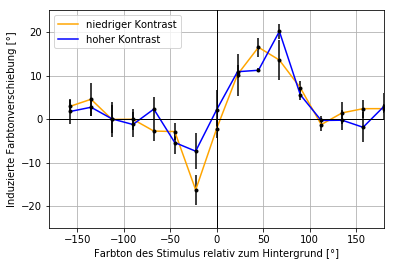

jgarzke; Hintergrund:45°


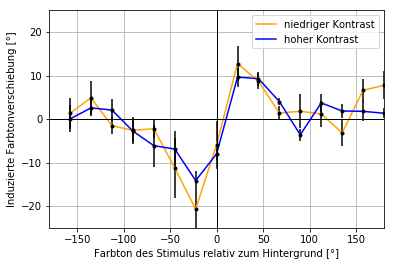

jgarzke; Hintergrund:90°


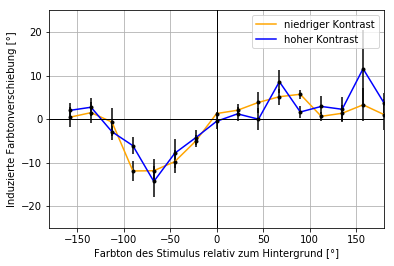

jgarzke; Hintergrund:135°


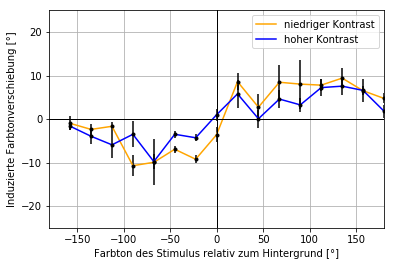

jgarzke; Hintergrund:180°


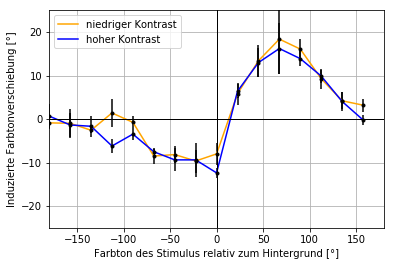

jgarzke; Hintergrund:225°


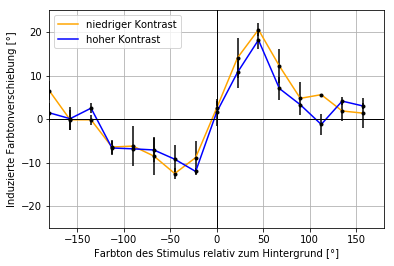

jgarzke; Hintergrund:270°


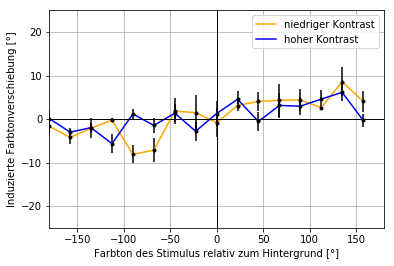

jgarzke; Hintergrund:315°


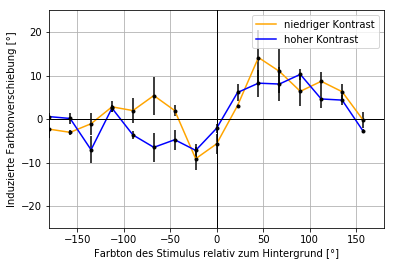

jsaumweber; Hintergrund:0°


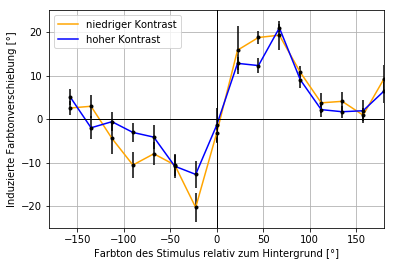

jsaumweber; Hintergrund:45°


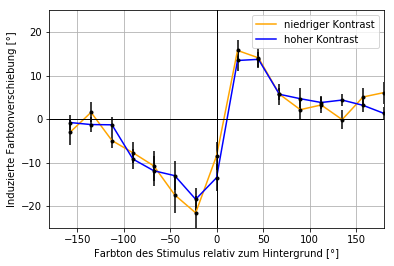

jsaumweber; Hintergrund:90°


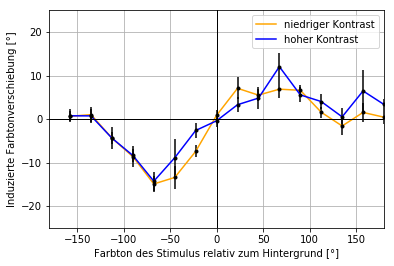

jsaumweber; Hintergrund:135°


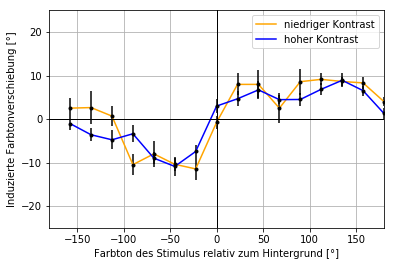

jsaumweber; Hintergrund:180°


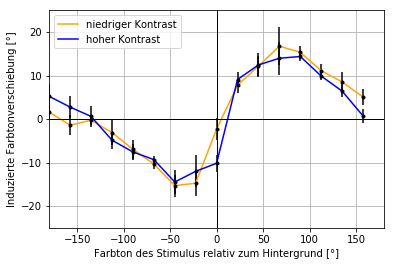

jsaumweber; Hintergrund:225°


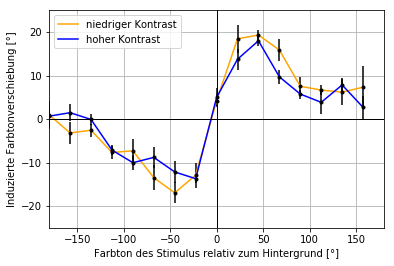

jsaumweber; Hintergrund:270°


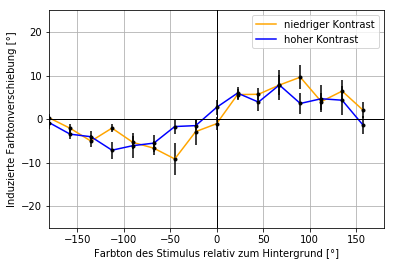

jsaumweber; Hintergrund:315°


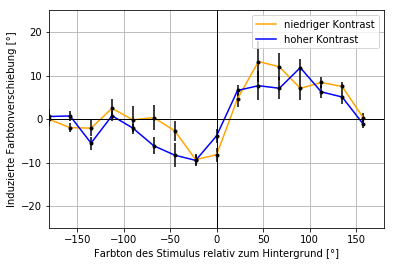

mhuber; Hintergrund:0°


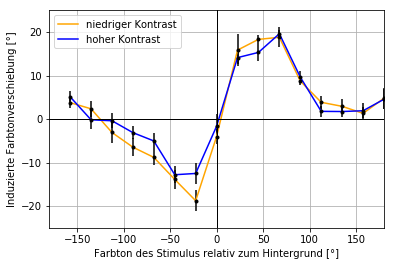

mhuber; Hintergrund:45°


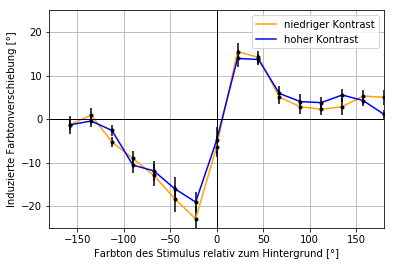

mhuber; Hintergrund:90°


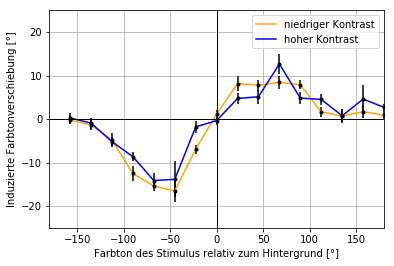

mhuber; Hintergrund:135°


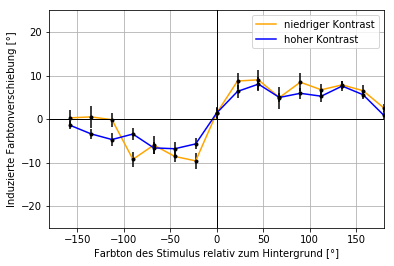

mhuber; Hintergrund:180°


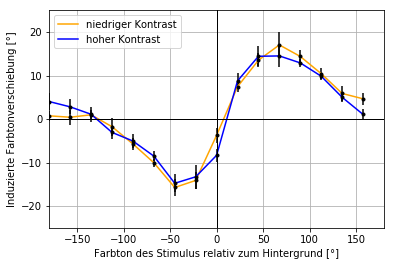

mhuber; Hintergrund:225°


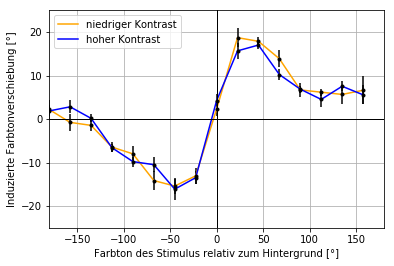

mhuber; Hintergrund:270°


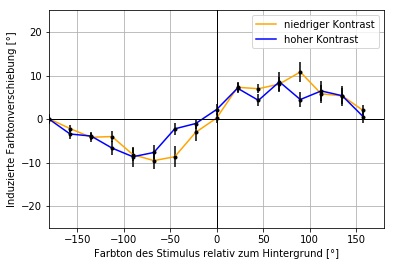

mhuber; Hintergrund:315°


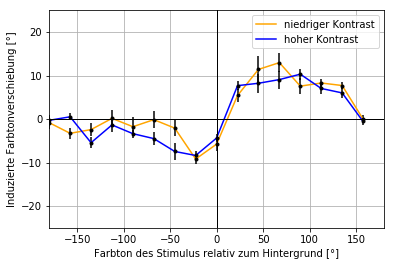

mkirschner; Hintergrund:0°


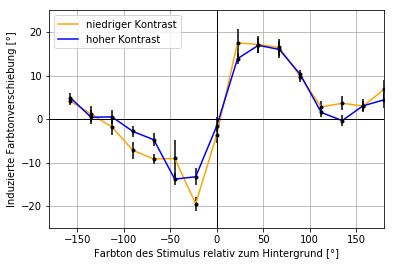

mkirschner; Hintergrund:45°


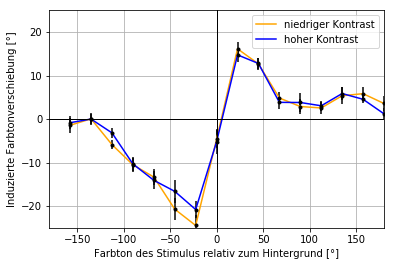

mkirschner; Hintergrund:90°


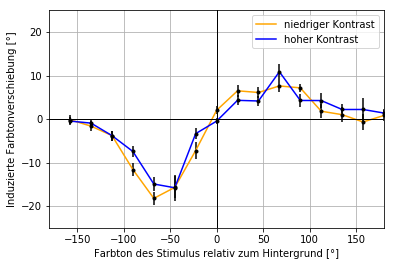

mkirschner; Hintergrund:135°


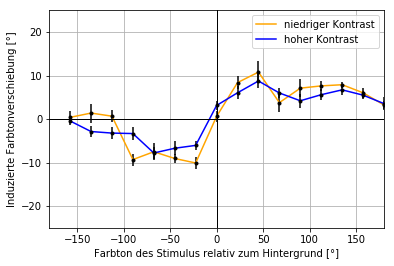

mkirschner; Hintergrund:180°


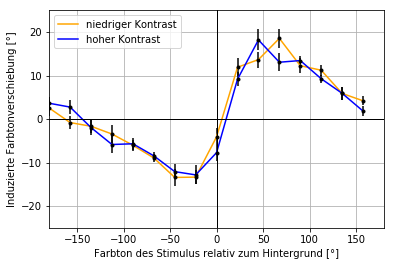

mkirschner; Hintergrund:225°


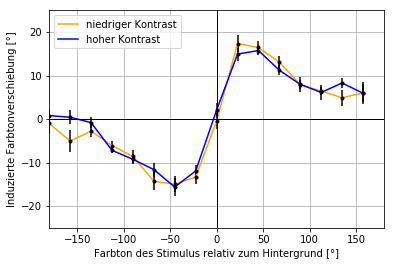

mkirschner; Hintergrund:270°


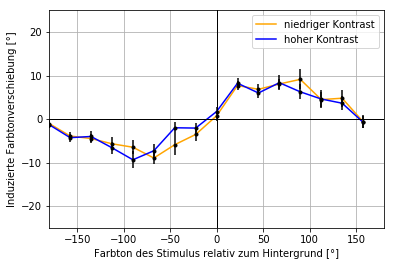

mkirschner; Hintergrund:315°


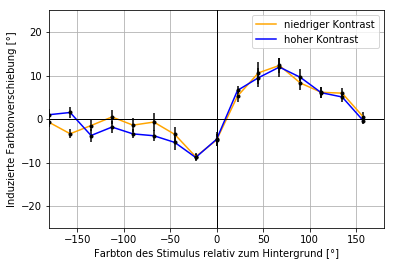

In [23]:
for proband in all_proband_dataframe_dict_high_contrast:
    for bg_value in sorted(per_proband_data_single_dataframe_low_contrast[proband]['bg'].unique()):
        print(str(proband) + '; Hintergrund:' + str(bg_value) + '°')

        x_low_contrast = per_proband_hue_shift_for_background_delta_fg_bg_dict_low_contrast[proband][bg_value]
        x_copy_low_contrast = x_low_contrast
        y_low_contrast = per_proband_hue_shift_for_background_delta_phi_mean_dict_low_contrast[proband][bg_value]
        sem_low_contrast = per_proband_hue_shift_for_background_delta_phi_sem_dict_low_contrast[proband][bg_value]
    
        x_low_contrast, y_low_contrast = zip(*sorted(zip(x_low_contrast, y_low_contrast)))
        x_copy_low_contrast, sem_low_contrast = zip(*sorted(zip(x_copy_low_contrast, sem_low_contrast)))
    
        x_high_contrast = per_proband_hue_shift_for_background_delta_fg_bg_dict_high_contrast[proband][bg_value]
        x_copy_high_contrast = x_high_contrast
        y_high_contrast = per_proband_hue_shift_for_background_delta_phi_mean_dict_high_contrast[proband][bg_value]
        sem_high_contrast = per_proband_hue_shift_for_background_delta_phi_sem_dict_high_contrast[proband][bg_value]
    
        x_high_contrast, y_high_contrast = zip(*sorted(zip(x_high_contrast, y_high_contrast)))
        x_copy_high_contrast, sem_high_contrast = zip(*sorted(zip(x_copy_high_contrast, sem_high_contrast)))
    
        plt.errorbar(x_low_contrast, y_low_contrast, yerr=sem_low_contrast, fmt='.k')
        plt.errorbar(x_high_contrast, y_high_contrast, yerr=sem_high_contrast, fmt='.k')
        plt.plot(x_low_contrast, y_low_contrast, color = 'orange', label = 'niedriger Kontrast')
        plt.plot(x_high_contrast, y_high_contrast, color = 'blue', label = 'hoher Kontrast')
        plt.legend(loc='best')

        ##################################
        plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
        plt.ylabel('Induzierte Farbtonverschiebung [°]')
        plt.axhline(0, color= 'black', lw=1)
        plt.axvline(0, color= 'black', lw=1)
        plt.axis([-180, 180, -25, 25])
        plt.grid(True)
        plt.show()

In [24]:
for proband in all_proband_dataframe_dict_high_contrast:
    for bg_value in sorted(per_proband_data_single_dataframe_low_contrast[proband]['bg'].unique()):
        print(str(proband) + '; Hintergrund:' + str(bg_value) + '°')
        
        x_low_contrast = per_proband_hue_shift_for_background_delta_fg_bg_dict_low_contrast[proband][bg_value]
        y_low_contrast = per_proband_hue_shift_for_background_delta_phi_mean_dict_low_contrast[proband][bg_value]
        x_low_contrast, y_low_contrast = zip(*sorted(zip(x_low_contrast, y_low_contrast)))
                                                                                                        
        x_high_contrast = per_proband_hue_shift_for_background_delta_fg_bg_dict_high_contrast[proband][bg_value]
        y_high_contrast = per_proband_hue_shift_for_background_delta_phi_mean_dict_high_contrast[proband][bg_value]
        x_high_contrast, y_high_contrast = zip(*sorted(zip(x_high_contrast, y_high_contrast)))
  
        twosample_results = scipy.stats.ttest_ind(y_low_contrast, y_high_contrast)
                                                                                                        
        print(twosample_results)
        
        
#        for i in range(len(x_low_contrast)):
#           print("fg_bg_value:" + str(x_low_contrast[i]) + "\n")
#            twosample_results = scipy.stats.ttest_ind([y_low_contrast[i]], [y_high_contrast[i]])
#                                                                                                       
#            print(twosample_results)

jgarzke; Hintergrund:0°
Ttest_indResult(statistic=-0.1861855284860911, pvalue=0.8535525443672896)
jgarzke; Hintergrund:45°
Ttest_indResult(statistic=0.10425438283786888, pvalue=0.9176613614770978)
jgarzke; Hintergrund:90°
Ttest_indResult(statistic=-0.4050187450519629, pvalue=0.6883374243722498)
jgarzke; Hintergrund:135°
Ttest_indResult(statistic=0.1538451472206683, pvalue=0.8787620912903151)
jgarzke; Hintergrund:180°
Ttest_indResult(statistic=0.39181685171074326, pvalue=0.6979630913367261)
jgarzke; Hintergrund:225°
Ttest_indResult(statistic=0.37237997347477, pvalue=0.7122277562932027)
jgarzke; Hintergrund:270°
Ttest_indResult(statistic=0.02209954004503469, pvalue=0.9825148920784473)
jgarzke; Hintergrund:315°
Ttest_indResult(statistic=0.8691788608866108, pvalue=0.3916503107482501)
jsaumweber; Hintergrund:0°
Ttest_indResult(statistic=-0.11732151856023383, pvalue=0.9073872250996703)
jsaumweber; Hintergrund:45°
Ttest_indResult(statistic=-0.020687365778545734, pvalue=0.9836320309668384)
jsa

In [25]:
#alte berechnung. läuft über ganze kurve, falls es tatsächlich so funkt, wie ich denke

for proband in all_proband_dataframe_dict_high_contrast:
    for bg_value in sorted(per_proband_data_single_dataframe_low_contrast[proband]['bg'].unique()):
        print(str(proband) + '; Hintergrund:' + str(bg_value) + '°')
        
        x_low_contrast = per_proband_hue_shift_for_background_delta_fg_bg_dict_low_contrast[proband][bg_value]
        y_low_contrast = per_proband_hue_shift_for_background_delta_phi_mean_dict_low_contrast[proband][bg_value]

        x_low_contrast, y_low_contrast = zip(*sorted(zip(x_low_contrast, y_low_contrast)))
        
        x_high_contrast = per_proband_hue_shift_for_background_delta_fg_bg_dict_high_contrast[proband][bg_value]
        y_high_contrast = per_proband_hue_shift_for_background_delta_phi_mean_dict_high_contrast[proband][bg_value]
    
        x_high_contrast, y_high_contrast = zip(*sorted(zip(y_high_contrast, y_high_contrast)))
        
        
        twosample_results = scipy.stats.ttest_ind(y_low_contrast, y_high_contrast)
        
        print(twosample_results)


jgarzke; Hintergrund:0°
Ttest_indResult(statistic=-0.18618552848609093, pvalue=0.8535525443672897)
jgarzke; Hintergrund:45°
Ttest_indResult(statistic=0.10425438283786888, pvalue=0.9176613614770978)
jgarzke; Hintergrund:90°
Ttest_indResult(statistic=-0.40501874505196284, pvalue=0.6883374243722498)
jgarzke; Hintergrund:135°
Ttest_indResult(statistic=0.15384514722066825, pvalue=0.8787620912903152)
jgarzke; Hintergrund:180°
Ttest_indResult(statistic=0.3918168517107432, pvalue=0.6979630913367263)
jgarzke; Hintergrund:225°
Ttest_indResult(statistic=0.37237997347477, pvalue=0.7122277562932027)
jgarzke; Hintergrund:270°
Ttest_indResult(statistic=0.02209954004503477, pvalue=0.9825148920784472)
jgarzke; Hintergrund:315°
Ttest_indResult(statistic=0.8691788608866109, pvalue=0.39165031074824996)
jsaumweber; Hintergrund:0°
Ttest_indResult(statistic=-0.1173215185602337, pvalue=0.9073872250996704)
jsaumweber; Hintergrund:45°
Ttest_indResult(statistic=-0.020687365778545734, pvalue=0.9836320309668384)
j